# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&appid={weather_api_key}&units={"metric"}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | qal'at bishah
City not found. Skipping...
Processing Record 5 of Set 1 | coquimbo
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | illizi
Processing Record 10 of Set 1 | mitrofanovka
Processing Record 11 of Set 1 | pisco
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | dunedin
Processing Record 15 of Set 1 | caconda
Processing Record 16 of Set 1 | edson
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | ponta delgada
Processing Record 19 of Set 1 | svetlyy
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | udachny
Processing Record 22 of 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,24.19,87,45,1.79,EC,1692497555
1,adamstown,-25.0660,-130.1015,17.24,53,3,9.24,PN,1692497277
2,albany,42.6001,-73.9662,18.23,73,4,3.03,US,1692497270
3,coquimbo,-29.9533,-71.3436,15.85,72,20,3.09,CL,1692496875
4,waitangi,-43.9535,-176.5597,12.12,95,100,4.92,NZ,1692497336


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.19,87,45,1.79,EC,1692497555
1,adamstown,-25.0660,-130.1015,17.24,53,3,9.24,PN,1692497277
2,albany,42.6001,-73.9662,18.23,73,4,3.03,US,1692497270
3,coquimbo,-29.9533,-71.3436,15.85,72,20,3.09,CL,1692496875
4,waitangi,-43.9535,-176.5597,12.12,95,100,4.92,NZ,1692497336


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

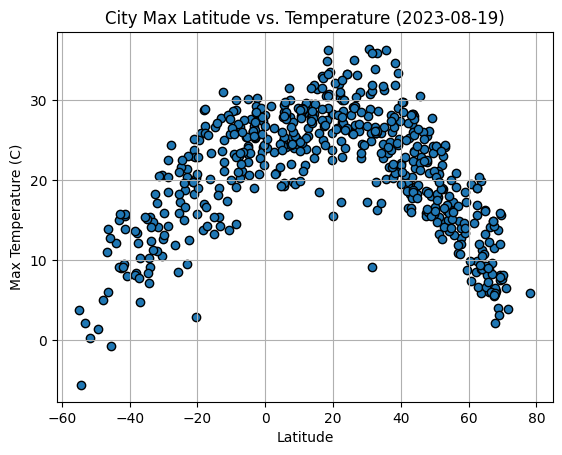

In [21]:
# Get the current date
current_date = datetime.datetime.now().strftime("%Y-%m-%d")

# Build scatter plot for Latitude vs. Temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

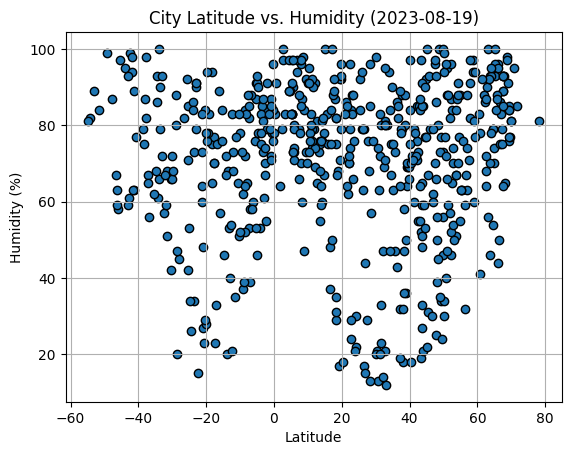

In [22]:
# Get the current date
current_date = datetime.datetime.now().strftime("%Y-%m-%d")

# Build scatter plot for Latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

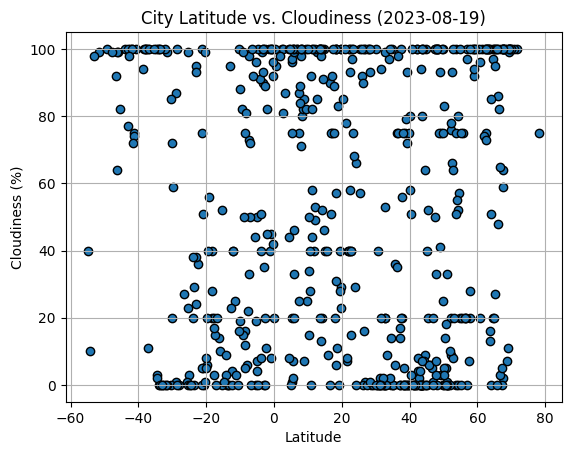

In [23]:
# Get the current date
current_date = datetime.datetime.now().strftime("%Y-%m-%d")

# Build scatter plot for Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

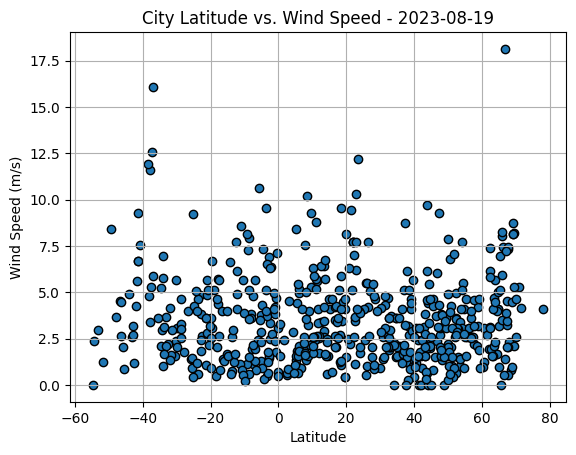

In [25]:
# Get the current date
current_date = datetime.datetime.now().strftime("%Y-%m-%d")

# Build scatter plot for Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed - {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Print the r-value
    print(f"The r-value is: {r_value:.2f}")
    
    # Calculate regression line values
    regression_line = slope * x_values + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    
    # Plot regression line
    plt.plot(x_values, regression_line, "r-")
    
    # Add annotation
    annotation = f"y = {slope:.2f}x + {intercept:.2f}\nR-value: {r_value:.2f}"
    plt.annotate(annotation, text_coordinates, fontsize=15, color="red")
    
    # Incorporate graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    
    # Show plot
    plt.show()


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,albany,42.6001,-73.9662,18.23,73,4,3.03,US,1692497270
7,illizi,26.4833,8.4667,26.89,17,16,4.21,DZ,1692497557
8,mitrofanovka,49.9708,39.6939,20.73,46,0,2.23,RU,1692497557
11,yellowknife,62.4560,-114.3525,16.90,68,75,6.17,CA,1692497559
14,edson,53.5835,-116.4356,16.08,51,0,1.03,CA,1692497561


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.19,87,45,1.79,EC,1692497555
1,adamstown,-25.0660,-130.1015,17.24,53,3,9.24,PN,1692497277
3,coquimbo,-29.9533,-71.3436,15.85,72,20,3.09,CL,1692496875
4,waitangi,-43.9535,-176.5597,12.12,95,100,4.92,NZ,1692497336
5,grytviken,-54.2811,-36.5092,-5.61,82,10,2.36,GS,1692497556


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.73


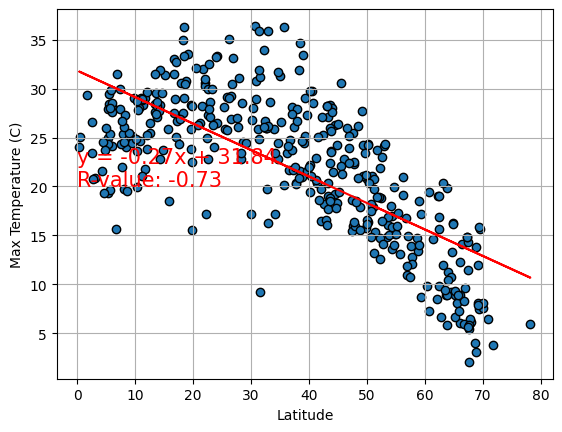

In [29]:
# Linear regression on Temperature vs. Latitude
create_linear_regression_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temperature (C)",
    "",
    (0, 20)
)



The r-value is: 0.81


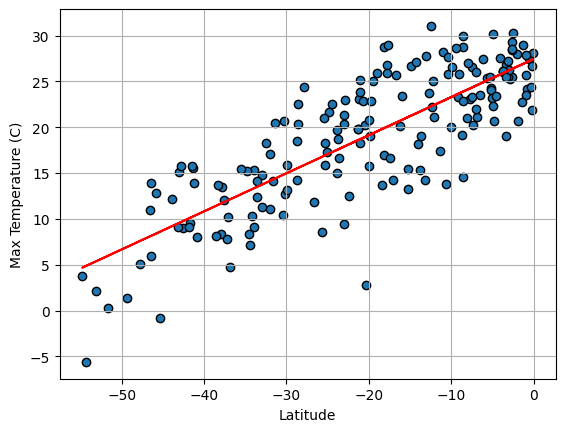

In [30]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temperature (C)",
    "",
    (-50, 40)
)

**Discussion about the linear relationship:** 
As you move northward from the equator, temperatures tend to decrease. 
As you move southward from the equator, temperatures tend to increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.00


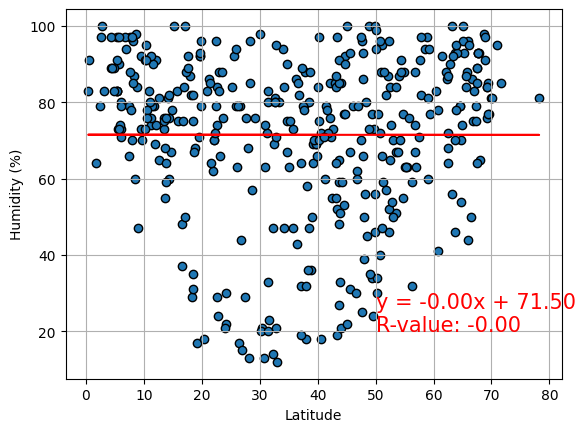

In [31]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "",
    (50, 20)
)

The r-value is: -0.07


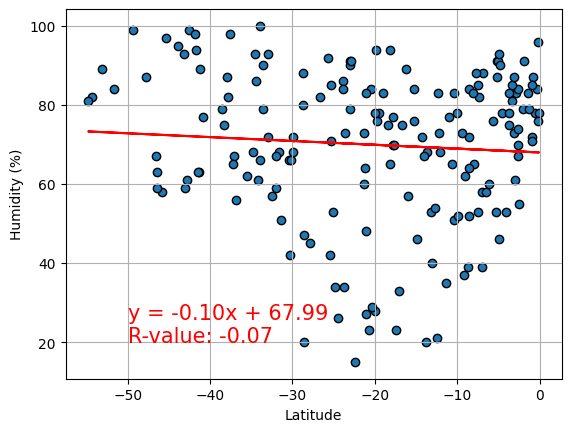

In [32]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "",
    (-50, 20)
)

**Discussion about the linear relationship:** In both hemispheres, the r-values close to zero imply that changes in humidity are not strongly influenced by changes in latitude. Humidity levels may be influenced by various local and regional factors other than latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.04


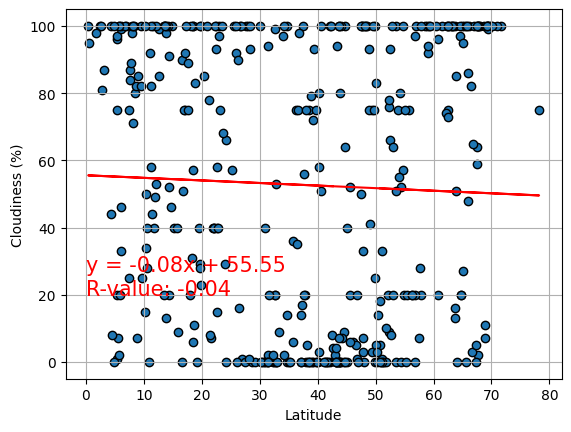

In [33]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "",
    (0, 20)
)

The r-value is: -0.20


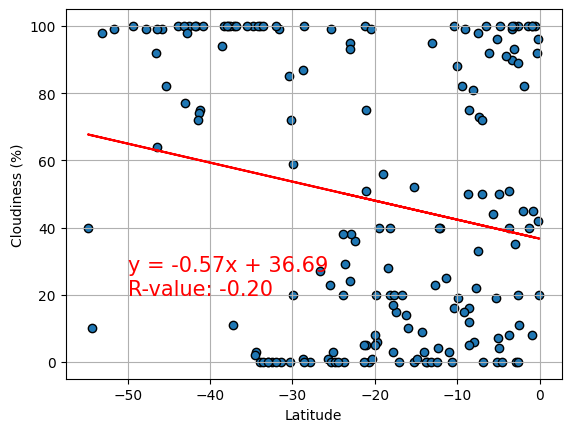

In [34]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "",
    (-50, 20)
)

**Discussion about the linear relationship:** In both hemispheres, the r-values close to zero suggest that cloudiness changes are not strongly related to changes in latitude. Cloudiness is influenced by various atmospheric and geographical factors beyond latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04


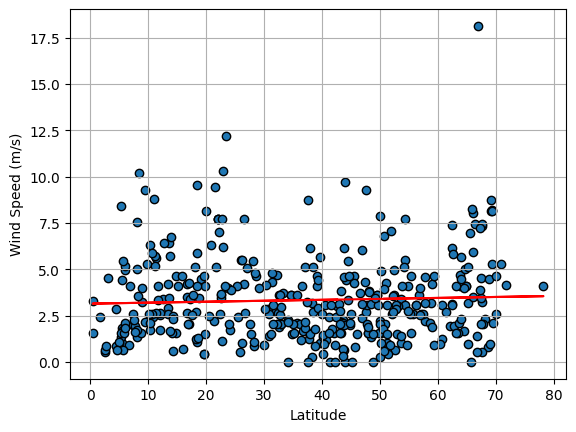

In [38]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "",
    (0, 25)
)

The r-value is: -0.12


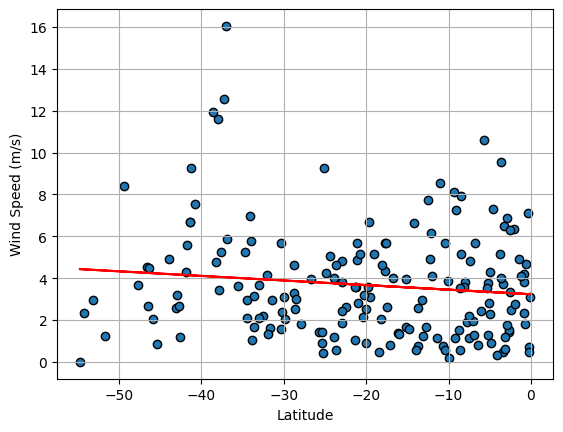

In [37]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "",
    (-50, 25)
)

**Discussion about the linear relationship:** In both hemispheres, the r-values close to zero suggest that wind speed changes are not strongly related to changes in latitude. Wind speed is influenced by various atmospheric and geographical factors beyond latitude.